# Human Resource WorkForce Analytics of Private Organization


# PROJECT GOAL
<br>

The **Requirement** of a Business Problem **is to develop a predictive model to Analyse and to Predit the WorkForce Analytics** of Private Organization to improve the company's perfomance using **Regression Analysis** with **Python**.


## What is Human Resource Analytics ?

**HR analytics** is a methodology for **creating insights on how investments in human capital assets contribute to the success of four principal outcomes**: 

       (a) generating revenue, 
       (b) minimizing expenses, 
       (c) mitigating risks, and 
       (d) executing strategic plans. 
   
This is done by applying statistical methods to integrated HR, talent management, financial, and operational data, says Collins in an exclusive discussion with HR Technologist.


## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
import pyodbc
import warnings
warnings.filterwarnings("ignore")

## Data Loader

In [24]:
Sql_Train ="""
SELECT * FROM HR_Analytics_Train
"""
Sql_Test ="""
SELECT * FROM HR_Analytics_Test
"""
class DataFrame_Loader_SQL:
    def __init__(self, DRIVER,server,db,Trusted_Connection):
        self.DRIVER = '{SQL Server}'
        self.server = 'DESKTOP-GQDTTAA'
        self.db = 'practice'
        self.Trusted_Connection = 'yes'
        
    def read_data(self,Sql_Train,Sql_Test):
        conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+self.server+';\
                              DATABASE='+self.db+';Trusted_Connection==yes')
        self.df = pd.read_sql(Sql_Train,conn)
        self.dft = pd.read_sql(Sql_Test,conn)
        return self.df,self.dft

In [25]:
sql_reader = DataFrame_Loader_SQL('{SQL Server}','DESKTOP-GQDTTAA','practice', 'yes')

In [27]:
dftrain,dftest = sql_reader.read_data(Sql_Train,Sql_Test)
print(dftrain.shape,dftest.shape)

(18359, 14) (15021, 13)


In [33]:
type_list =['training_hours','target']
dftrain[type_list] = dftrain[type_list].apply(pd.to_numeric, errors='coerce', axis=1)

In [36]:
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,None,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,None,No relevent experience,no_enrollment,Masters,STEM,8,None,None,2,88,1


In [37]:
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,None,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,None,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,None,None,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


## Exploratory Data Analysis

In [9]:
class DataFrame_Information():
    

    def __init__(self):
        
        print("Attribute Information object created")
        
        
        
    def Attribute_information(self,df):
        
        """
        This method will give us a basic
        information of the dataframe like
        Count of Attributes,Count of rows,
        Numerical Attributes, Categorical 
        Attributes, Factor Attributes etc..
        """
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info

    def __get_missing_values(self,data):
        
        """
        It is a Private method, so it cannot 
        be accessed by object outside the 
        class. This function will give us 
        a basic information like count 
        of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

        
    def Agg_Tabulation(self,data):
        
        
        """
        This method is a extension of 
        schema will gives the aditional 
        information about the data
        like Entropy value, Missing 
        Value Percentage and some observations
        """
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def __iqr(self,x):
        
        
        """
        It is a private method which 
        returns you interquartile Range
        """
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __outlier_count(self,x):
        
        
        """
        It is a private method which 
        returns you outlier present
        in the interquartile Range
        """
        upper_out = x.quantile(q=0.75) + 1.5 * self.__iqr(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__iqr(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])

    def num_count_summary(self,df):
        
        
        """
        This method will returns 
        you the information about
        numerical attributes like
        Positive values,Negative Values
        Unique count, Zero count 
        positive and negative inf-
        nity count and count of outliers
        etc 
        
        """
        
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Negative Infinity count']= df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive Infinity count']= df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']= self.__outlier_count(df_num[c])
            i = i+1
        return data_info_num
    
    def statistical_summary(self,df):
        
        
        """
        This method will returns 
        you the varoius percentile
        of the data including count 
        and mean
        """
    
        df_num = df._get_numeric_data()

        data_stat_num = pd.DataFrame()

        try:
            data_stat_num = pd.concat([df_num.describe().transpose(),
                                       pd.DataFrame(df_num.quantile(q=0.10)),
                                       pd.DataFrame(df_num.quantile(q=0.90)),
                                       pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num

In [10]:
info = DataFrame_Information()

Attribute Information object created


In [11]:
info.Attribute_information(dftrain)

,value
No of observation,18359
No of Variables,14
No of Numerical Variables,4
No of Factor Variables,0
No of Categorical Variables,10
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [12]:
info.Attribute_information(dftest)

,value
No of observation,15021
No of Variables,13
No of Numerical Variables,3
No of Factor Variables,0
No of Categorical Variables,10
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [13]:
info.Agg_Tabulation(dftrain)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,enrollee_id,int64,0,18359,0.000000,23798,29166,46,14.16
1,city,object,0,123,0.000000,city_149,city_83,city_16,4.83
2,city_development_index,float64,0,93,0.000000,0.689,0.923,0.91,4.45
3,gender,object,4098,3,22.321477,Male,Male,NaN,0.51
4,relevent_experience,object,0,2,0.000000,Has relevent experience,Has relevent experience,Has relevent experience,0.83
5,enrolled_university,object,342,3,1.862847,no_enrollment,no_enrollment,no_enrollment,1.00
6,education_level,object,457,5,2.489242,Graduate,Graduate,Graduate,1.53
7,major_discipline,object,2838,6,15.458358,STEM,STEM,STEM,0.76
8,experience,object,59,22,0.321368,3,14,6,4.12
9,company_size,object,4779,8,26.030830,100-500,<10,50-99,2.84


In [18]:
info.Agg_Tabulation(dftest)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,enrollee_id,int64,0,15021,0.000000,16548,12036,11061,13.87
1,city,object,0,123,0.000000,city_33,city_28,city_103,4.86
2,city_development_index,float64,0,93,0.000000,0.448,0.939,0.92,4.49
3,gender,object,3388,3,22.555090,NaN,Male,Male,0.49
4,relevent_experience,object,0,2,0.000000,No relevent experience,No relevent experience,No relevent experience,0.83
5,enrolled_university,object,279,3,1.857400,Full time course,no_enrollment,Full time course,0.99
6,education_level,object,395,5,2.629652,Graduate,Graduate,Graduate,1.56
7,major_discipline,object,2393,6,15.931030,STEM,STEM,STEM,0.79
8,experience,object,44,22,0.292923,<1,>20,3,4.15
9,company_size,object,4051,8,26.968910,1000-4999,50-99,NaN,2.83


In [15]:
info.num_count_summary(dftrain)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
enrollee_id,0.0,18359.0,0.0,18359.0,0.0,0.0,0.0,0.0
city_development_index,0.0,18359.0,0.0,93.0,0.0,0.0,0.0,448.0
training_hours,0.0,18359.0,0.0,241.0,0.0,0.0,0.0,965.0
target,0.0,2425.0,15934.0,2.0,0.0,0.0,0.0,2425.0


In [20]:
info.num_count_summary(dftest)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
enrollee_id,0.0,15021.0,0.0,15021.0,0.0,0.0,0.0,0.0
city_development_index,0.0,15021.0,0.0,93.0,0.0,0.0,0.0,361.0
training_hours,0.0,15021.0,0.0,241.0,0.0,0.0,0.0,748.0


In [16]:
info.statistical_summary(dftrain)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
enrollee_id,18359.0,16729.360096,9643.749725,1.000,8378.500,16706.00,25148.50,33380.000,3432.800,30091.200,31762.100
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949,0.624,0.926,0.926
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000,11.000,148.000,192.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000,0.000,1.000,1.000


In [21]:
info.statistical_summary(dftest)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
enrollee_id,15021.0,16643.004327,9626.895233,6.000,8316.000,16664.00,24908.00,33378.000,3252.000,29974.000,31648.000
city_development_index,15021.0,0.846683,0.109709,0.448,0.794,0.91,0.92,0.949,0.624,0.926,0.926
training_hours,15021.0,65.158179,59.719211,1.000,23.000,47.00,89.00,336.000,11.000,145.000,188.000


## Data Preprocessing

In [14]:
class DataFrame_Preprocessor():
    

    def __init__(self):
        
        print("Attribute Information object created")
        
        
    
    def encode_experience(self,data):
    
        data['experience'] = data['experience'].map({'<1': 0,
                                                      '1': 1,
                                                      '2': 2,
                                                      '3': 3,
                                                      '4': 4,
                                                      '5': 5,
                                                      '6': 6,
                                                      '7': 7,
                                                      '8': 8,
                                                      '9': 9,
                                                      '10': 10,
                                                      '11': 11,
                                                      '12': 12,
                                                      '13': 13,
                                                      '14': 14,
                                                      '15': 15,
                                                      '16': 16,
                                                      '17': 17,
                                                      '18': 18,
                                                      '19': 19,
                                                      '20': 20,
                                                      '>20': 21,
                                                      'new' :22
                                                     })
        
        return data
    
    
    def encode_last_new_job(self,data):
    
        data['last_new_job'] = data['last_new_job'].map({'never': 0,
                                                      '1': 1,
                                                      '2': 2,
                                                      '3': 3,
                                                      '4': 4,
                                                      '>4': 5})
        return data
    
    def encode_company_size(self,data):
    
        data['company_size'] = data['company_size'].map({'<10': 0,
                                                      '10/49': 1,
                                                      '50-99': 2,
                                                      '100-500': 3,
                                                      '500-999': 4,
                                                      '1000-4999': 5,
                                                      '5000-9999': 6,
                                                      '10000+': 7})
        return data
    
    
    def encode_education_level(self,data):
    
        data['education_level'] = data['education_level'].map({'Primary School': 0,
                                                            'High School': 1,
                                                            'Graduate': 2,
                                                            'Masters': 3,
                                                            'Phd': 4})
        return data
    
    
    
    def encode_enrolled_university(self,data):
    
        data['enrolled_university'] = data['enrolled_university'].map({'no_enrollment': 0,
                                                                   'Full time course': 1,
                                                                   'Part time course': 2
                                                                   })
        return data


    def value_counts_of_variables(self,data):
        
        for i in data.columns:
            
            print("="*50)
            
            print(data[i].value_counts())
            
    
    def Impute_Categorical_missing(self,data):
        
        for column in data.columns:
            
            mode = data[column].mode()
            
            data[column] = data[column].fillna(mode[0])
            
        return data

In [15]:
preprocess = DataFrame_Preprocessor()

Attribute Information object created


In [16]:
preprocess.value_counts_of_variables(dftrain)

2047     1
2660     1
31322    1
29275    1
19036    1
        ..
5336     1
31957    1
29908    1
19667    1
6147     1
Name: enrollee_id, Length: 18359, dtype: int64
city_103    4358
city_21     1672
city_16     1654
city_114    1472
city_160     827
            ... 
city_111       3
city_129       3
city_121       3
city_171       2
city_140       1
Name: city, Length: 123, dtype: int64
0.920    5185
0.624    1672
0.910    1654
0.926    1472
0.698     655
         ... 
0.487       4
0.649       4
0.781       3
0.625       3
0.664       2
Name: city_development_index, Length: 93, dtype: int64
Male      12884
Female     1188
Other       189
Name: gender, dtype: int64
Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64
no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64
Graduate          10769
Masters            4319
High School        2032
Phd                 459
Pri

In [17]:
dftrain = preprocess.encode_company_size(dftrain)
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,3.0,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,0.0,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,2.0,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,2.0,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [18]:
dftrain = preprocess.encode_education_level(dftrain)
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,2.0,STEM,3,3.0,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,2.0,STEM,14,0.0,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,2.0,STEM,6,2.0,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,2.0,STEM,14,2.0,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,3.0,STEM,8,NaN,NaN,2,88,1


In [19]:
dftrain = preprocess.encode_enrolled_university(dftrain)
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,0.0,2.0,STEM,3,3.0,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,0.0,2.0,STEM,14,0.0,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,0.0,2.0,STEM,6,2.0,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,0.0,2.0,STEM,14,2.0,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,0.0,3.0,STEM,8,NaN,NaN,2,88,1


In [20]:
dftrain = preprocess.encode_experience(dftrain)
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,0.0,2.0,STEM,3.0,3.0,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,0.0,2.0,STEM,14.0,0.0,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,0.0,2.0,STEM,6.0,2.0,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,0.0,2.0,STEM,14.0,2.0,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,0.0,3.0,STEM,8.0,NaN,NaN,2,88,1


In [21]:
dftrain = preprocess.encode_last_new_job(dftrain)
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,0.0,2.0,STEM,3.0,3.0,Pvt Ltd,1.0,106,0
1,29166,city_83,0.923,Male,Has relevent experience,0.0,2.0,STEM,14.0,0.0,Funded Startup,1.0,69,0
2,46,city_16,0.910,NaN,Has relevent experience,0.0,2.0,STEM,6.0,2.0,Public Sector,2.0,4,0
3,18527,city_64,0.666,Male,Has relevent experience,0.0,2.0,STEM,14.0,2.0,Pvt Ltd,1.0,26,0
4,21751,city_100,0.887,NaN,No relevent experience,0.0,3.0,STEM,8.0,NaN,NaN,2.0,88,1


In [22]:
dftrain = preprocess.Impute_Categorical_missing(dftrain)
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,0.0,2.0,STEM,3.0,3.0,Pvt Ltd,1.0,106,0
1,29166,city_83,0.923,Male,Has relevent experience,0.0,2.0,STEM,14.0,0.0,Funded Startup,1.0,69,0
2,46,city_16,0.910,Male,Has relevent experience,0.0,2.0,STEM,6.0,2.0,Public Sector,2.0,4,0
3,18527,city_64,0.666,Male,Has relevent experience,0.0,2.0,STEM,14.0,2.0,Pvt Ltd,1.0,26,0
4,21751,city_100,0.887,Male,No relevent experience,0.0,3.0,STEM,8.0,2.0,Pvt Ltd,2.0,88,1


In [23]:
preprocess.value_counts_of_variables(dftest)

8188     1
4871     1
23326    1
17181    1
29467    1
        ..
19939    1
21984    1
11743    1
9694     1
32768    1
Name: enrollee_id, Length: 15021, dtype: int64
city_103    3494
city_21     1350
city_16     1274
city_114    1234
city_160     704
            ... 
city_8         2
city_139       2
city_18        2
city_31        2
city_179       2
Name: city, Length: 123, dtype: int64
0.920    4198
0.624    1350
0.910    1274
0.926    1234
0.698     521
         ... 
0.512       2
0.807       2
0.649       2
0.824       2
0.487       2
Name: city_development_index, Length: 93, dtype: int64
Male      10578
Female      897
Other       158
Name: gender, dtype: int64
Has relevent experience    11102
No relevent experience      3919
Name: relevent_experience, dtype: int64
no_enrollment       11228
Full time course     2565
Part time course      949
Name: enrolled_university, dtype: int64
Graduate          8743
Masters           3478
High School       1676
Phd                422
Primary

In [24]:
dftest = preprocess.encode_company_size(dftest)
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,5.0,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,2.0,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,2.0,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,0.0,Pvt Ltd,2,65


In [25]:
dftest = preprocess.encode_education_level(dftest)
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,2.0,STEM,<1,5.0,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,2.0,STEM,>20,2.0,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,2.0,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,4.0,STEM,>20,2.0,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,2.0,STEM,6,0.0,Pvt Ltd,2,65


In [26]:
dftest = preprocess.encode_enrolled_university(dftest)
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,1.0,2.0,STEM,<1,5.0,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,0.0,2.0,STEM,>20,2.0,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,1.0,2.0,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,0.0,4.0,STEM,>20,2.0,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,0.0,2.0,STEM,6,0.0,Pvt Ltd,2,65


In [27]:
dftest = preprocess.encode_experience(dftest)
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,1.0,2.0,STEM,0.0,5.0,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,0.0,2.0,STEM,21.0,2.0,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,1.0,2.0,STEM,3.0,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,0.0,4.0,STEM,21.0,2.0,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,0.0,2.0,STEM,6.0,0.0,Pvt Ltd,2,65


In [28]:
dftest = preprocess.encode_last_new_job(dftest)
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,1.0,2.0,STEM,0.0,5.0,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,0.0,2.0,STEM,21.0,2.0,Pvt Ltd,1.0,94
2,11061,city_103,0.920,Male,No relevent experience,1.0,2.0,STEM,3.0,NaN,NaN,1.0,17
3,5032,city_104,0.924,Male,No relevent experience,0.0,4.0,STEM,21.0,2.0,Pvt Ltd,2.0,76
4,17599,city_77,0.830,Male,Has relevent experience,0.0,2.0,STEM,6.0,0.0,Pvt Ltd,2.0,65


In [29]:
dftest = preprocess.Impute_Categorical_missing(dftest)
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,Male,No relevent experience,1.0,2.0,STEM,0.0,5.0,Public Sector,1.0,15
1,12036,city_28,0.939,Male,No relevent experience,0.0,2.0,STEM,21.0,2.0,Pvt Ltd,1.0,94
2,11061,city_103,0.920,Male,No relevent experience,1.0,2.0,STEM,3.0,2.0,Pvt Ltd,1.0,17
3,5032,city_104,0.924,Male,No relevent experience,0.0,4.0,STEM,21.0,2.0,Pvt Ltd,2.0,76
4,17599,city_77,0.830,Male,Has relevent experience,0.0,2.0,STEM,6.0,0.0,Pvt Ltd,2.0,65


## Feature Engineering

In [30]:
class Base_Feature_Engineering():

    def __init__(self):
        print("Feature Engineering object created")

    
    def add_noise(self,series, noise_level):
        return series * (1 + noise_level * np.random.randn(len(series)))

    def target_encode(self,trn_series=None, 
                      tst_series=None, 
                      target=None, 
                      min_samples_leaf=1, 
                      smoothing=1,
                      noise_level=0):
        """
        Smoothing is computed like in the following paper by Daniele Micci-Barreca
        https://scihub.wikicn.top/10.1145/507533.507538
        trn_series : training categorical feature as a pd.Series
        tst_series : test categorical feature as a pd.Series
        target : target data as a pd.Series
        min_samples_leaf (int) : minimum samples to take category average into account
        smoothing (int) : smoothing effect to balance categorical average vs prior  
        """ 
        assert len(trn_series) == len(target)
        assert trn_series.name == tst_series.name
        temp = pd.concat([trn_series, target], axis=1)
        # Compute target mean 
        averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
        # Compute smoothing
        smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
        # Apply average function to all target data
        prior = target.mean()
        # The bigger the count the less full_avg is taken into account
        averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
        averages.drop(["mean", "count"], axis=1, inplace=True)
        # Apply averages to trn and tst series
        ft_trn_series = pd.merge(
            trn_series.to_frame(trn_series.name),
            averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
            on=trn_series.name,
            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

        ft_trn_series.index = trn_series.index 
        ft_tst_series = pd.merge(
            tst_series.to_frame(tst_series.name),
            averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
            on=tst_series.name,
            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

        ft_tst_series.index = tst_series.index
        return self.add_noise(ft_trn_series, noise_level), self.add_noise(ft_tst_series, noise_level)
    
    
    def fit_transform(self,data,data1,a,b):
        return self.target_encode(data[a],data1[b],target=data.target,min_samples_leaf=100,smoothing=10,noise_level=0.01)

In [31]:
FE = Base_Feature_Engineering()

Feature Engineering object created


In [32]:
dftrain['gender'],dftest['gender'] = FE.fit_transform(dftrain,dftest,'gender','gender')

In [33]:
dftrain['relevent_experience'],dftest['relevent_experience'] = FE.fit_transform(dftrain,dftest,'relevent_experience','relevent_experience')

In [34]:
dftrain['major_discipline'],dftest['major_discipline'] = FE.fit_transform(dftrain,dftest,'major_discipline','major_discipline')

In [35]:
dftrain['company_type'],dftest['company_type'] = FE.fit_transform(dftrain,dftest,'company_type','company_type')

In [36]:
dftrain['city'],dftest['city'] = FE.fit_transform(dftrain,dftest,'city','city')

In [37]:
dftrain['enrolled_university'],dftest['enrolled_university'] = FE.fit_transform(dftrain,dftest,'enrolled_university','enrolled_university')

In [38]:
dftrain['education_level'],dftest['education_level'] = FE.fit_transform(dftrain,dftest,'education_level','education_level')

In [39]:
dftrain.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,0.128904,0.689,0.129993,0.116952,0.118163,0.140868,0.132294,3.0,3.0,0.133497,1.0,106,0
1,29166,0.100031,0.923,0.131746,0.116547,0.119276,0.141872,0.133907,14.0,0.0,0.091741,1.0,69,0
2,46,0.092136,0.910,0.130297,0.117151,0.118037,0.141631,0.131941,6.0,2.0,0.153614,2.0,4,0
3,18527,0.105646,0.666,0.130379,0.116399,0.119239,0.141876,0.132898,14.0,2.0,0.132849,1.0,26,0
4,21751,0.161245,0.887,0.131886,0.172609,0.117273,0.119195,0.132576,8.0,2.0,0.132592,2.0,88,1


In [40]:
dftest.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,0.131969,0.448,0.131150,0.175254,0.189251,0.140309,0.134200,0.0,5.0,0.151346,1.0,15
1,12036,0.076248,0.939,0.129593,0.175479,0.116457,0.141130,0.133986,21.0,2.0,0.134452,1.0,94
2,11061,0.128877,0.920,0.130014,0.174538,0.188204,0.141640,0.133424,3.0,2.0,0.134078,1.0,17
3,5032,0.067297,0.924,0.132102,0.176181,0.117588,0.116161,0.132542,21.0,2.0,0.134357,2.0,76
4,17599,0.130285,0.830,0.131473,0.114926,0.118739,0.142076,0.135198,6.0,0.0,0.134589,2.0,65


## Data modelling

In [43]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x = dftrain.drop(['target'],axis=1)
y = dftrain['target']
x_train,x_test,y_train,y_test=train_test_split(x\
                ,y,test_size=0.30,random_state=42)

class Model_Selector():
    
    

    def __init__(self,n_estimators=100,\
            random_state=42,max_depth=10):
        print("Model Selector object created")
        
    """
    This method helps to select
    the best machine learning 
    model to compute the relationship
    betweem i/p and d/p variable
    
    """    
        
        
    def Classifier_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LogisticRegression()))
        models.append(("RF", RandomForestClassifier()))
        models.append(("KNN", KNeighborsClassifier()))
        models.append(("CART", DecisionTreeClassifier()))
        models.append(("XGB", XGBClassifier()))
        result = []
        names = []
        scoring = 'accuracy'
        seed = 42
        
        

        for name, model in models:
            kfold = KFold(n_splits = 5, random_state =seed)
            cv_results = cross_val_score(model, x_train,\
                    y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
            
            
            
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [44]:
MS = Model_Selector()

Model Selector object created


('LR', 0.8710601788581712, 0.003743357114713283)
('RF', 0.8706710737998055, 0.004099512178911515)
('KNN', 0.8596212165927352, 0.004853892913949913)
('CART', 0.7683448884368752, 0.006541051185776078)
('XGB', 0.8619558469429297, 0.00400787559875676)


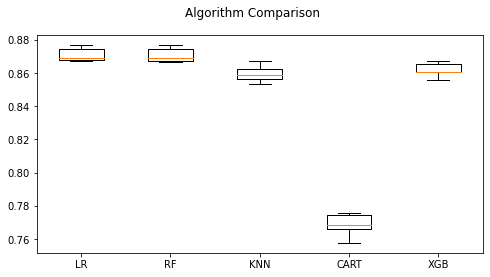

In [45]:
MS.Classifier_Model_Selector(dftrain)

In [46]:
dftrain['target'].value_counts()

0    15934
1     2425
Name: target, dtype: int64

In [263]:
class Data_Modelling():
    
    
    
    def __init__(self):
        
        print("Data Modelling Object Created")
    
        
    """
    Logistic Regression has been 
    implemented from scratch
    """    
    class Logistic_Regression:
    
        """
        Constructor Initializing
        with Arguments of LogReg
        """

        def __init__(self, 
                     learning_rate,
                     n_iters,
                     weights,
                     bias):

            self.learning_rate = 0.001
            self.n_iters = 1000
            self.weights = None
            self.bias = 0

        """
        Calculated Cost Function
        of Logistic Regression
        """

        def __sigmoid(self, x):
            return 1 / (1 + np.exp(-x))

        """
        Fitting the Model
        """

        def Fit_LogReg(self, X, y):
            n_samples, n_features = X.shape


            self.weights = np.zeros(n_features)


            for _ in range(self.n_iters):

                linear_model = np.dot(X, self.weights) + self.bias

                y_predicted = self.__sigmoid(linear_model)

                """
                updating weights
                """
                dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
                db = (1 / n_samples) * np.sum(y_predicted - y)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

        """
        Predicting the outcomes
        """
        def Predict(self, X):
            
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.__sigmoid(linear_model)
            y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
            return np.array(y_predicted_cls)
        
        def get_classification_report(self,modelname,y_test):
            
            ypred = Log_Pred
            report = metrics.classification_report(y_test, ypred,output_dict=True)
            print(metrics.confusion_matrix(y_test, ypred))
            print(metrics.accuracy_score(y_test, ypred))
            df_classification_report = pd.DataFrame(report).transpose()
            return df_classification_report
        
        
    class Random_Forest():
        
        
        def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    random_state,
                    criterion):
            
            self.n_estimators = 500
            self.max_depth = 5
            self.min_samples_split = 3
            self.min_samples_leaf = 3
            self.max_leaf_nodes = None
            self.bootstrap = True
            self.class_weight = dict({0:1655, 1:1950})
            self.random_state = 29 
            self.criterion = 'entropy'

            
            print("Random Forest Object Created")
        
        def Random_Forest_Model(self,df):
        
            Classifier = RandomForestClassifier(n_estimators = self.n_estimators,
                        max_depth = self.max_depth,
                        min_samples_split = self.min_samples_split,
                        min_samples_leaf = self.min_samples_leaf,
                        max_leaf_nodes = self.max_leaf_nodes,
                        bootstrap = self.bootstrap,
                        class_weight= self.class_weight,
                        criterion = self.criterion)

            Classifier.fit(x_train_smote,y_train_smote)

            RF_pred=Classifier.predict(x_test)

            print(metrics.accuracy_score(y_test, RF_pred))

            print(metrics.confusion_matrix(y_test, RF_pred))

            print(metrics.classification_report(y_test, RF_pred))
            
            
    class Extreme_Gradient_Boosting():
        
        def __init__(self,n_estimators,
                    max_depth,
                    min_child_weight,
                    learning_rate,
                    Subsample,
                    Alpha,
                    Lamda,
                    class_weight,
                    random_state):
            
            self.n_estimators = 500
            self.max_depth = 5
            self.min_child_weight = 3
            self.learning_rate = 0.07
            self.Subsample = 0.7
            self.Alpha = 0
            self.Lamda = 1.5
            self.class_weight = dict({0:655, 1:1950})
            self.random_state = 29 

            
            print("Extreme Gradient Boosting Object Created")
            
            
        
        def Extreme_Gradient_Boosting_Model(self,df):

            XGB_Classifier = XGBClassifier(n_estimators = self.n_estimators,
                        learning_rate = self.learning_rate,
                        max_depth = self.max_depth,
                        min_child_weight = self.min_child_weight,
                        random_state = self.random_state,
                        Subsample = self.Subsample,
                        Alpha = self.Alpha,
                        Lamda = self.Lamda,
                        class_weight= self.class_weight)

            XGB_Classifier.fit(x_train_smote,y_train_smote)

            XGB_pred=XGB_Classifier.predict(x_test)

            print(metrics.accuracy_score(y_test, XGB_pred))

            print(metrics.confusion_matrix(y_test, XGB_pred))

            print(metrics.classification_report(y_test, XGB_pred))

In [231]:
model = Data_Modelling().Logistic_Regression(0.001,1000,None,0)

Data Modelling Object Created


In [232]:
Log_Model = model.Fit_LogReg(x_train,y_train)
Log_Pred = model.Predict(x_test)
Log_Pred

array([1, 1, 1, ..., 1, 1, 1])

In [233]:
model.get_classification_report(Log_Model,y_test)

[[  14 4726]
 [   2  766]]
0.14161220043572983


,precision,recall,f1-score,support
0,0.875000,0.002954,0.005887,4740.000000
1,0.139476,0.997396,0.244728,768.000000
accuracy,0.141612,0.141612,0.141612,0.141612
macro avg,0.507238,0.500175,0.125308,5508.000000
weighted avg,0.772443,0.141612,0.039190,5508.000000


In [260]:
RF_model = Data_Modelling().Random_Forest(500,5,3,3,None,True,'balanced',29,'entropy')
XGB_model = Data_Modelling().Extreme_Gradient_Boosting(500,5,3,0.07,0.7,0,1.5,'balanced',29)

Data Modelling Object Created
Random Forest Object Created
Data Modelling Object Created
Extreme Gradient Boosting Object Created


In [248]:
RF_Model = RF_model.Random_Forest_Model(dftrain)
RF_Model
# dict({0:1655, 1:1950})

0.8605664488017429
[[4740    0]
 [ 768    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4740
           1       0.00      0.00      0.00       768

    accuracy                           0.86      5508
   macro avg       0.43      0.50      0.46      5508
weighted avg       0.74      0.86      0.80      5508



In [261]:
XGB_Model = XGB_model.Extreme_Gradient_Boosting_Model(dftrain)
XGB_Model

[18:06:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { Alpha, Lamda, Subsample, class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8538489469862018
[[4687   53]
 [ 752   16]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4740
           1       0.23      0.02      0.04       768

    accuracy                           0.85      5508
   macro avg       0.55      0.50      0.48      5508
weighted avg       0.77      0.85      0.80      5508



In [250]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_sample(x_train,y_train)
from collections import Counter
print("Before smote:",Counter(y_train))
print("After smote:",Counter(y_train_smote))

Before smote: Counter({0: 11194, 1: 1657})
After smote: Counter({0: 11194, 1: 11194})


In [251]:
model = Data_Modelling().Logistic_Regression(0.001,1000,None,0)

Data Modelling Object Created


In [252]:
Log_Model = model.Fit_LogReg(x_train_smote,y_train_smote)
Log_Pred = model.Predict(x_test)
Log_Pred

array([1, 1, 1, ..., 1, 1, 1])

In [253]:
model.get_classification_report(Log_Model,y_test)

[[   1 4739]
 [   1  767]]
0.1394335511982571


,precision,recall,f1-score,support
0,0.500000,0.000211,0.000422,4740.000000
1,0.139303,0.998698,0.244501,768.000000
accuracy,0.139434,0.139434,0.139434,0.139434
macro avg,0.319651,0.499454,0.122461,5508.000000
weighted avg,0.449707,0.139434,0.034455,5508.000000


In [254]:
RF_model = Data_Modelling().Random_Forest(500,5,3,3,None,True,'balanced',29,'entropy')
XGB_model = Data_Modelling().Extreme_Gradient_Boosting(500,5,3,0.07,0.7,0,1.5,29)

Data Modelling Object Created
Random Forest Object Created
Data Modelling Object Created
Extreme Gradient Boosting Object Created


In [255]:
RF_Model = RF_model.Random_Forest_Model(dftrain)
RF_Model

0.7167755991285403
[[3612 1128]
 [ 432  336]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4740
           1       0.23      0.44      0.30       768

    accuracy                           0.72      5508
   macro avg       0.56      0.60      0.56      5508
weighted avg       0.80      0.72      0.75      5508



In [264]:
XGB_Model = XGB_model.Extreme_Gradient_Boosting_Model(dftrain)
XGB_Model

[18:06:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { Alpha, Lamda, Subsample, class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8538489469862018
[[4687   53]
 [ 752   16]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4740
           1       0.23      0.02      0.04       768

    accuracy                           0.85      5508
   macro avg       0.55      0.50      0.48      5508
weighted avg       0.77      0.85      0.80      5508



# Data Modelling

## HyperParameter Tuning

In [307]:
from sklearn.model_selection import KFold, cross_val_score,RandomizedSearchCV
class Model_Classifier_HyperParameter_Tuning():
    

    def __init__(self):
        
        print("HyperParameter_Tuning object created")
        
    class XGB_Classifier_HyperParameter_Tuning():
    

        def __init__(self):

            print("XGB HyperParameter_Tuning object created")


        def Fit_XGB_HyperParameter_Tuner(self,dftrain):
            

            xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                                        objective = "binary:logistic")
            


            parameters = {"learning_rate": [0.1, 0.01, 0.001],
                           "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
                           "max_depth": [2, 4, 7, 10],
                           "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
                           "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
                           "reg_alpha": [0, 0.5, 1],
                           "reg_lambda": [1, 1.5, 2, 3, 4.5],
                           "min_child_weight": [1, 3, 5, 7],
                           "n_estimators": [100, 250, 500, 1000]}
            

            from sklearn.model_selection import RandomizedSearchCV

            xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                                         cv = 3, random_state = 29 )

            # Fit the model
            model_xgboost = xgb_rscv.fit(x_train_smote, y_train_smote)
            return model_xgboost
        
        
        def XGB_Get_Best_Prams(self):
            
            print("Learning Rate: ", Xgb_model.best_estimator_.get_params()["learning_rate"])
            print("Gamma: ", Xgb_model.best_estimator_.get_params()["gamma"])
            print("Max Depth: ", Xgb_model.best_estimator_.get_params()["max_depth"])
            print("Subsample: ", Xgb_model.best_estimator_.get_params()["subsample"])
            print("Max Features at Split: ", Xgb_model.best_estimator_.get_params()["colsample_bytree"])
            print("Alpha: ", Xgb_model.best_estimator_.get_params()["reg_alpha"])
            print("Lamda: ", Xgb_model.best_estimator_.get_params()["reg_lambda"])
            print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",Xgb_model.best_estimator_.get_params()["min_child_weight"])
            print("Number of Trees: ", Xgb_model.best_estimator_.get_params()["n_estimators"])


        
        def get_classification_report(self,modelname,y_test):
            
            
            
            ypred = modelname.predict(x_test)
            report = metrics.classification_report(y_test, ypred,output_dict=True)
            print(metrics.confusion_matrix(y_test, ypred))
            print(metrics.accuracy_score(y_test, ypred))
            df_classification_report = pd.DataFrame(report).transpose()
            return df_classification_report
        
        class RF_Classifier_HyperParameter_Tuning():
    

            def __init__(self):

                print("RF HyperParameter_Tuning object created")


            def Fit_RF_HyperParameter_Tuner(self,dftrain):
                
                

                param_grid = {"max_depth": [1, 3, 5, 7, 9, 10],
                              "max_features": [1, 3, 10, 20,40, 50,80],
                              "min_samples_split": [1, 3, 10, 15, 20],
                              "min_samples_leaf": [1, 3, 5, 10],
                              "bootstrap": [True, False],
                              "criterion": ["gini", "entropy"],
                              "n_estimators": [100, 250, 500, 1000]}

                clf = RandomForestClassifier(random_state=29, class_weight='balanced', n_jobs=-1)
                model = RandomizedSearchCV(clf, param_grid, scoring = 'f1_micro', cv=10)

                model.fit(x_train_smote, y_train_smote)

                return model

            def RF_Get_Best_Prams(self):
                
                
                

                print("n_estimators: ", RF_model.best_estimator_.get_params()["n_estimators"])
                print("Max Depth: ", RF_model.best_estimator_.get_params()["max_depth"])
                print("min_samples_split: ", RF_model.best_estimator_.get_params()["min_samples_split"])
                print("min_samples_leaf: ", RF_model.best_estimator_.get_params()["min_samples_leaf"])
                print("max_leaf_nodes: ", RF_model.best_estimator_.get_params()["max_leaf_nodes"])
                print("bootstrap: ", RF_model.best_estimator_.get_params()["bootstrap"])
                print("class_weight: ", RF_model.best_estimator_.get_params()["class_weight"])
                print("criterion: ",RF_model.best_estimator_.get_params()["criterion"])
                print("Number of Trees: ", RF_model.best_estimator_.get_params()["n_estimators"])

            def Evaluation_Report(self,modelname,y_test):
                
                
                return HP_XGB.get_classification_report(RF_model,y_test)

In [308]:
HP_XGB = Model_Classifier_HyperParameter_Tuning().XGB_Classifier_HyperParameter_Tuning()
HP_RF = Model_Classifier_HyperParameter_Tuning().XGB_Classifier_HyperParameter_Tuning().RF_Classifier_HyperParameter_Tuning()

HyperParameter_Tuning object created
XGB HyperParameter_Tuning object created
HyperParameter_Tuning object created
XGB HyperParameter_Tuning object created
RF HyperParameter_Tuning object created


In [280]:
RF_model = HP_RF.Fit_RF_HyperParameter_Tuner(dftrain)
RF_model

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=29),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 5, 7, 9, 10],
                                        'max_features': [1, 3, 10, 20, 40, 50,
                                                         80],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [1, 3, 10, 15, 20],
                                        'n_estimators': [100, 250, 500, 1000]},
                   scoring='f1_micro')

In [281]:
HP_RF.RF_Get_Best_Prams()

n_estimators:  250
Max Depth:  10
min_samples_split:  15
min_samples_leaf:  10
max_leaf_nodes:  None
bootstrap:  True
class_weight:  balanced
criterion:  entropy
Number of Trees:  250


In [282]:
HP_RF.Evaluation_Report(RF_model,y_test)

[[4032  708]
 [ 537  231]]
0.7739651416122004


,precision,recall,f1-score,support
0,0.882469,0.850633,0.866258,4740.000000
1,0.246006,0.300781,0.270650,768.000000
accuracy,0.773965,0.773965,0.773965,0.773965
macro avg,0.564238,0.575707,0.568454,5508.000000
weighted avg,0.793725,0.773965,0.783211,5508.000000


In [309]:
Xgb_model = HP_XGB.Fit_XGB_HyperParameter_Tuner(dftrain)
Xgb_model

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           validate_parameters=None,
                                           verbosity=None),
                   param_distributions={'colsample_b

In [310]:
HP_XGB.XGB_Get_Best_Prams()

Learning Rate:  0.01
Gamma:  1.5
Max Depth:  7
Subsample:  0.7
Max Features at Split:  0.6
Alpha:  0
Lamda:  3
Minimum Sum of the Instance Weight Hessian to Make a Child:  7
Number of Trees:  1000


In [311]:
HP_XGB.get_classification_report(Xgb_model,y_test)

[[4708   32]
 [ 756   12]]
0.8569353667392883


,precision,recall,f1-score,support
0,0.861640,0.993249,0.922775,4740.000000
1,0.272727,0.015625,0.029557,768.000000
accuracy,0.856935,0.856935,0.856935,0.856935
macro avg,0.567184,0.504437,0.476166,5508.000000
weighted avg,0.779526,0.856935,0.798231,5508.000000


# Feature Selection

In [333]:
from sklearn.feature_selection import RFE

class Feature_Selection(Data_Modelling.Random_Forest):

    def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    random_state,
                    criterion):
        
        Data_Modelling.Random_Forest.__init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    random_state,
                    criterion)
        print("Feature Selection object created")
        
    def Classification_Feature_Selector(self,data):
        estimator = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    random_state = self.random_state,
                    criterion = self.criterion)
        
        selector = RFE(estimator,6,step=1)
        selector = selector.fit(x_train,y_train)
        rank =pd.DataFrame(selector.ranking_,\
                        columns=['Importance'])
        Columns = pd.DataFrame(x_train.columns,\
                            columns=['Columns'])
        Var = pd.concat([rank,Columns],axis=1)
        Var.sort_values(["Importance"], axis=0,\
                    ascending=True, inplace=True) 
        return Var
    
    def Feature_visualizer(self,data):
        RF_Selector = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    random_state = self.random_state,
                    criterion = self.criterion)
        
        RF_Selector = RF_Selector.fit(x_train,y_train)
        importances = RF_Selector.feature_importances_
        std = np.std([tree.feature_importances_ for tree \
                          in RF_Selector.estimators_],
                         axis=0)
        indices = np.argsort(importances)[::-1]

            # Print the feature ranking
        print("Feature ranking:")
        for f in range(x_train.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f],\
                                        importances[indices[f]]))

            # Plot the feature importances of the forest

        plt.figure(1, figsize=(14, 13))
        plt.title("Feature importances")
        plt.bar(range(x_train.shape[1]), importances[indices],
                   color="g", yerr=std[indices], align="center")
        plt.xticks(range(x_train.shape[1]), \
                    x_train.columns[indices],rotation=90)
        plt.xlim([-1, x_train.shape[1]])
        plt.show()    

In [335]:
FS = Feature_Selection(500,5,3,3,None,True,'balanced',29,'entropy')

Random Forest Object Created
Feature Selection object created


In [336]:
FS.Classification_Feature_Selector(dftrain)

,Importance,Columns
1,1,city
2,1,city_development_index
4,1,relevent_experience
5,1,enrolled_university
6,1,education_level
7,1,major_discipline
8,2,experience
0,3,enrollee_id
10,4,company_type
3,5,gender


Feature ranking:
1. feature 1 (0.270057)
2. feature 2 (0.179855)
3. feature 5 (0.094050)
4. feature 4 (0.088050)
5. feature 8 (0.058206)
6. feature 7 (0.053508)
7. feature 6 (0.051216)
8. feature 0 (0.049807)
9. feature 10 (0.043047)
10. feature 3 (0.039738)
11. feature 12 (0.030842)
12. feature 9 (0.029053)
13. feature 11 (0.012569)


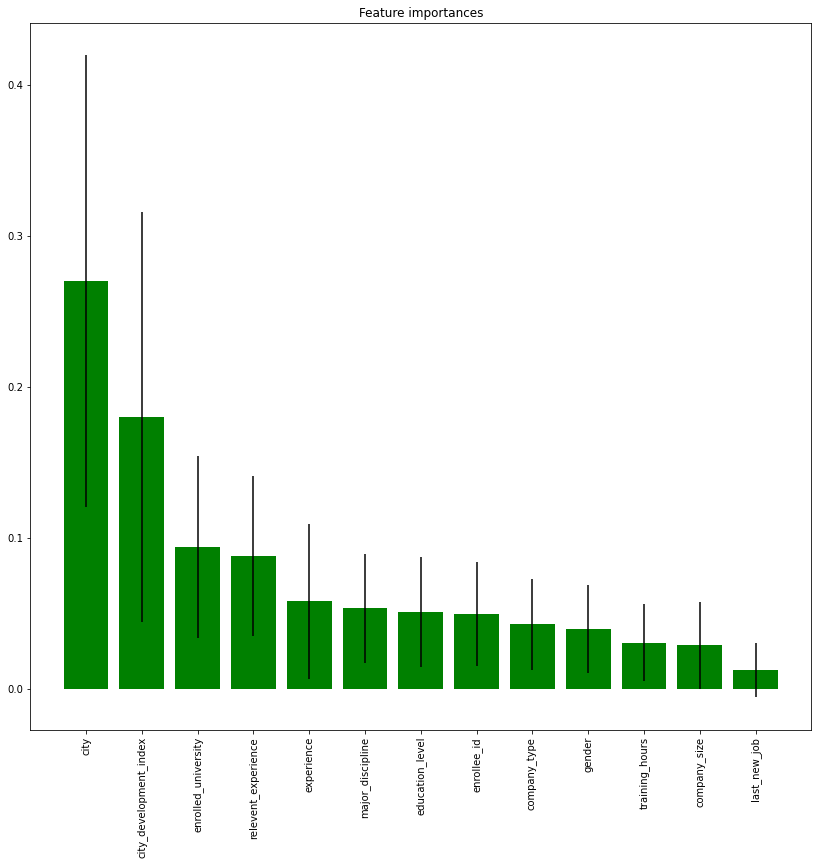

In [337]:
FS.Feature_visualizer(dftrain)

## Prediction for Original Test Data

In [320]:
import joblib
class Original_Test_Data_Prediction():

    def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    random_state,
                    criterion):
        
        self.n_estimators = 250
        self.max_depth = 10
        self.min_samples_split = 15
        self.min_samples_leaf = 10
        self.max_leaf_nodes = None
        self.bootstrap = True
        self.class_weight = dict({0:1655, 1:1950})
        self.random_state = 29 
        self.criterion = 'entropy'

        print("Prediction object created")
        
        
    def Random_Forest_Model(self,traindata,testdata):
        
        RF_Selector = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    criterion = self.criterion)
        RF_Selector = RF_Selector.fit(x_train_smote,y_train_smote)
        rf_pred = RF_Selector.predict(testdata)
        print(rf_pred)
        return RF_Selector
        
    def Dump_Model(self,object,modelname):
        return joblib.dump(RF_Selector,  'RF_Modeljob.pkl',compress=3)
    
    def Load_Model(self,modelname):
        return joblib.load('RF_Modeljob.pkl')

In [316]:
modelpredictor = Original_Test_Data_Prediction(250,10,15,10,None,True,'balanced',29,'entropy')

Prediction object created


In [318]:
RF_Selector = modelpredictor.Random_Forest_Model(dftrain,dftest)
RF_Selector

[1 0 0 ... 0 1 1]


RandomForestClassifier(class_weight={0: 1655, 1: 1950}, criterion='entropy',
                       max_depth=10, min_samples_leaf=10, min_samples_split=15,
                       n_estimators=250)

## Serializing Model

In [321]:
RF_Selector = modelpredictor.Dump_Model(RF_Selector,'RF_Modeljob.pkl')
RF_Selector

['RF_Modeljob.pkl']

In [322]:
RF_Selector = modelpredictor.Load_Model('RF_Modeljob.pkl')
RF_Selector

RandomForestClassifier(class_weight={0: 1655, 1: 1950}, criterion='entropy',
                       max_depth=10, min_samples_leaf=10, min_samples_split=15,
                       n_estimators=250)